In [1]:
import numpy as np
import math as mth
import scipy.stats as sps
import matplotlib.pyplot as plt
from __future__ import division

N=10000
%pylab inline

class mydistr_gen(sps.rv_continuous):
    def _pdf(self, x):
        return 5 * x ** (-6)
mydistr = mydistr_gen(a=1, b=inf, name='mydistr')

Populating the interactive namespace from numpy and matplotlib


Мое распределение (у которого первые 4 момента конечны, а пятый нет) имеет плотность $$5*x^{-6}I_{(1, +\inf)}(x)$$

### Построение графика плотности

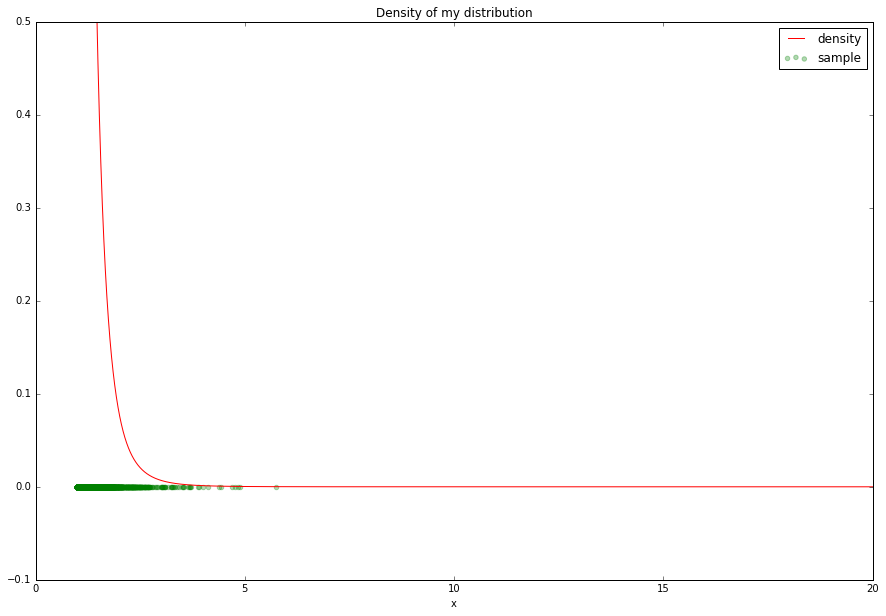

In [6]:
grid = np.linspace(1, 20, N)
plt.figure(figsize=(15, 10))
plt.plot(grid, mydistr._pdf(grid), color='red', linewidth=1, label='density')
sample = mydistr.rvs(size = N)
plt.scatter(sample, np.zeros(10000), color='green', alpha=0.3, label='sample')
plt.title('Density of my distribution')
plt.legend()
plt.xlim((0, 20))
plt.ylim((-0.1, 0.5))
plt.xlabel('x')
plt.show()

### Вычисление оценки дисперсии и построение графика разности 

Дисперсия моего распределения:

In [7]:
realdisp = mydistr.var()

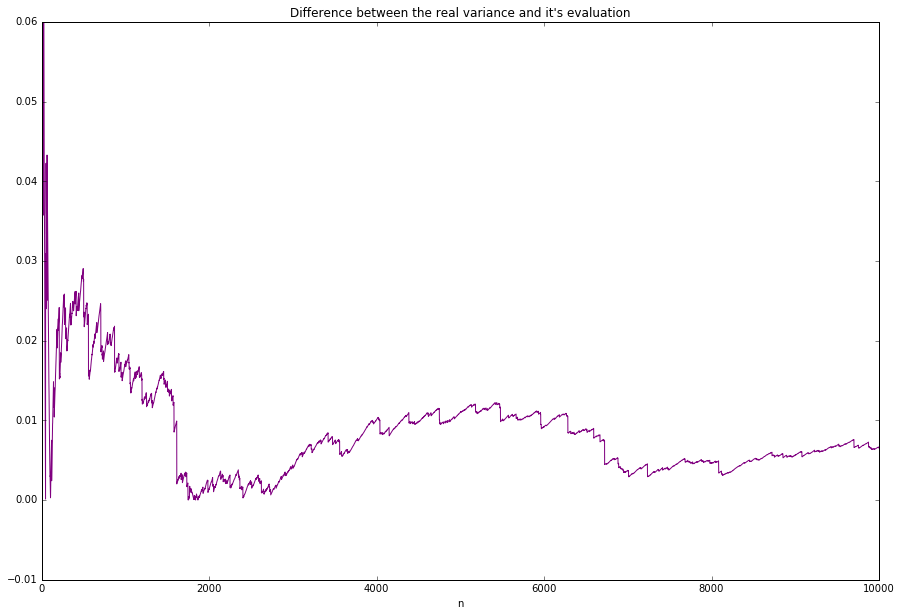

In [9]:
disp = list()
time = np.arange(1, N)
for n in time:
    disp.append(abs(sample[:n].var() - realdisp))
plt.figure(figsize=(15, 10))
plt.plot(time, disp, color='purple', linewidth=1)
plt.title('Difference between the real variance and it\'s evaluation')
plt.xlabel('n')
plt.xlim((1, N))
plt.ylim((-0.01, 0.06))
plt.show()

### Построение графика оценки дисперсии для распределения Коши

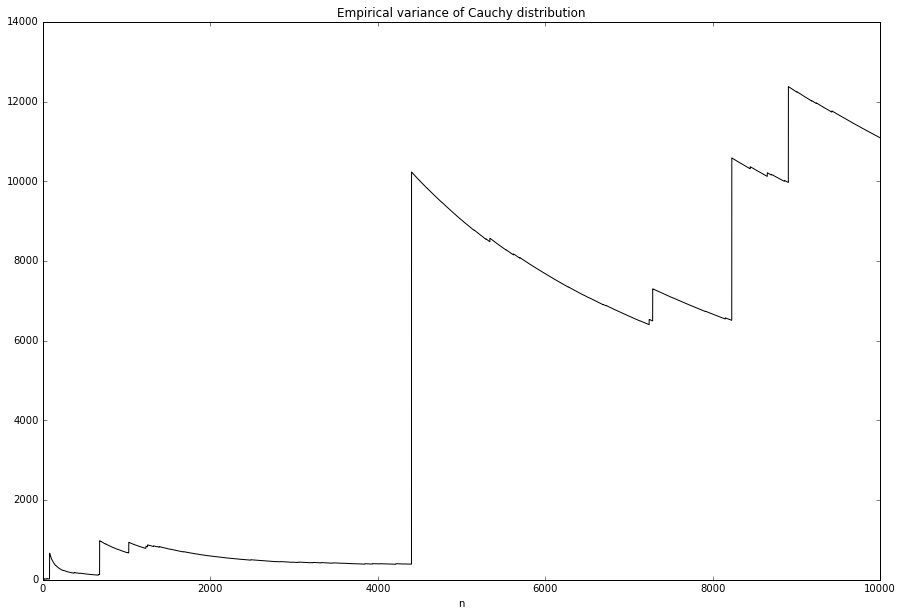

In [12]:
couchysample = sps.cauchy.rvs(size=N)
couchydisp = list()
for n in time:
    couchydisp.append(couchysample[:n].var())
plt.figure(figsize=(15, 10))
plt.plot(time, couchydisp, color='black', linewidth=1)
plt.title('Empirical variance of Cauchy distribution')
plt.xlim((1, N))
plt.xlabel('n')
plt.show()